# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("crimtab.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [41]:
# Checking the shape of the data (dimensions)
data.shape

# 924 rows and 3 columns

(924, 3)

In [42]:
data.head()

,Var1,Var2,Freq
1,9.4,142.24,0
2,9.5,142.24,0
3,9.6,142.24,0
4,9.7,142.24,0
5,9.8,142.24,0


# Answer to Question 2 :

The key objective of the case study is to model/predict the "Frequency" using predictor variables var1 and var2 denoting finger length and height respectively

The response variable : Freq as we see is a "count" variable 

# Answer to Question 3 :

In [43]:
pd.DataFrame([data["Freq"].mean(), data["Freq"].var(), data["Freq"].var()/data["Freq"].mean()], index=['Mean','Variance','Ratio'])

,0
Mean,3.246753
Variance,68.753781
Ratio,21.176165


# Answer to Question 4 :

Observations :
The mean Freq is 3.25 and the variance is 68.75, ~21% of the mean. 
The data is clearly over-dispersed

# Answer to Question 5 :

Summarising the dataset provided

In [44]:
data.describe()

,Var1,Var2,Freq
count,924.000000,924.000000,924.000000
mean,11.450000,168.910000,3.246753
std,1.212748,16.123221,8.291790
min,9.400000,142.240000,0.000000
25%,10.400000,154.940000,0.000000
50%,11.450000,168.910000,0.000000
75%,12.500000,182.880000,1.000000
max,13.500000,195.580000,58.000000


Observations :
Here : var 1 denotes the prisoner's finger length
Var1 has max value of 13.5 and median of 11.45

Var 2 denotes for the prisoner's height
Var2 has max value of 195.6 and median of 168.9

Freq has a max value of 58 with mean of 3.25

# Answer to Question 6 :

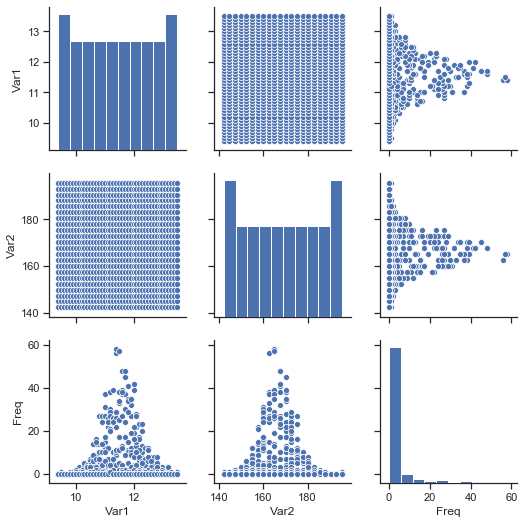

In [47]:
# Scatter plot matrix
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data)

# Answer to Question 7 :

In [49]:
corrMatrix = data.corr()
print (corrMatrix)

# Looking at the plot : it seems var1 and var2 are highly correlated  with each other
# Also : Freq the response/target variable is more correlated with var 1 (finger length) than var 2 (height)

              Var1          Var2      Freq
Var1  1.000000e+00  1.338582e-17  0.031471
Var2  1.338582e-17  1.000000e+00 -0.063420
Freq  3.147103e-02 -6.341962e-02  1.000000


# Answer to Question 8 :

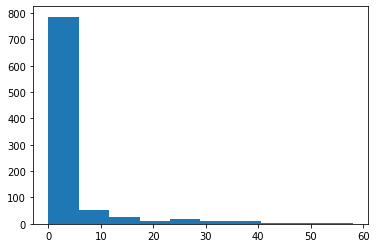

In [46]:
plt.hist(data["Freq"])
plt.show()

Observations :
a) The distribution here clearly looks like a Poisson Distribution
b) It looks clumped at 0 (total zeroes : 285 out of 900 overall)
c) Histogram indicates that this dataset has abundance of zeroes

# Answer to Question 9 :

In [ ]:
# We have seen that the response variable "Freq" is clearly a count variable.
# The distribution as we clearly see isn't normal which the implementation of linear regression model assumptions require.
# The count data does not follow a normal distribution, because it simply can not and 
# hence, simple linear regression is not the way to go. 
# Hence, we go for Poisson , Negative Binomial models for count variables.

# Answer to Question 10 :

In [50]:
# Check datatypes of all variables in the given dataset
print(data.dtypes)

Var1    float64
Var2    float64
Freq      int64
dtype: object


# Answer to Question 11:

Fitting a Poisson Model
GLM with poisson in Python

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [52]:
data_pois=glm('Freq ~ Var1+Var2', data = data,
family = sm.families.Poisson()).fit()
print(data_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Freq   No. Observations:                  924
Model:                            GLM   Df Residuals:                      921
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5626.5
Date:                Mon, 06 Apr 2020   Deviance:                       10209.
Time:                        10:21:32   Pearson chi2:                 1.92e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1072      0.258      8.155      0.0

# Answer to Question 12 :

AIC stands for : Akaike Information Criterion or AIC is an alternative criterion for model selection and is based on log of maximum likelihood function under the assumed model when the model dimension is also unknown
AIC does not provide a test for model fit but makes a statement about the relative quality of models and the model with smallest AIC is prefered.

# Answer to Question 13 :
Outliers/Leverage/Influence Points

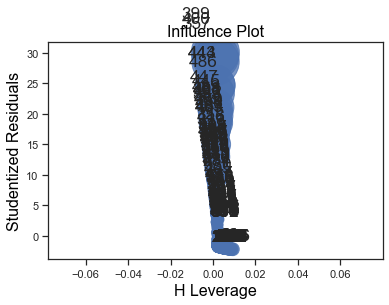

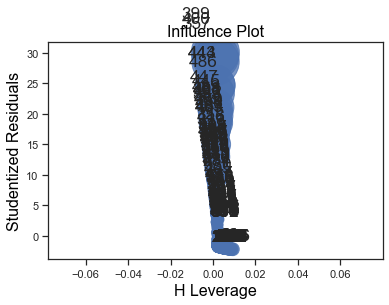

In [53]:
infl = data_pois.get_influence(observed=False)
infl.plot_influence()

In [55]:
# 10 observations are nominated as large + outliers: (as we see above in the leverage plot + at extremes )
data.loc[[357,398,399,400,443,444,445,447,486,489], :]

,Var1,Var2,Freq
357,11.4,162.56,56
398,11.3,165.10,39
399,11.4,165.10,58
400,11.5,165.10,57
443,11.6,167.64,48
444,11.7,167.64,48
445,11.8,167.64,41
447,12.0,167.64,42
486,11.7,170.18,45
489,12.0,170.18,39


# Answer to Question 14 :
Poisson Model goodness of fit

In [56]:
print(data_pois.summary())
# The output from summary(data.pois) above showed that the Poisson model fits quite badly. 

# The residual deviance is way too higher than the residual degrees of freedom
# If the asssumed model (Poisson) fits the data well, the residual deviance are expected to be 
# approximately equal to the residual degrees of freedom.

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Freq   No. Observations:                  924
Model:                            GLM   Df Residuals:                      921
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5626.5
Date:                Mon, 06 Apr 2020   Deviance:                       10209.
Time:                        10:24:33   Pearson chi2:                 1.92e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1072      0.258      8.155      0.0

# Answer to Question 15 :
Check overdispersion of data

In [57]:
# As, we clearly saw in answer 2:  As, we clearly saw in answer 2:  The mean Freq is 3.25 and the variance is 68.75, 
# ~21% of the mean. 

# Thus the data are highly over dispersed

# Variance > Mean : Overdispersion

# If the variance is equal to the mean, the dispersion statistic would equal one.
# When the dispersion statistic is close to one, a Poisson model fits. 
# If it is larger than one, a negative binomial model fits better.

# The existence of overdispersion leads to the requirement of alternative models that fit the data better.
# Overdispersion is a common phenomenon with count data which is due to either excess of zeros or heterogeneity of population.


#Overdisperson Test
data_pois.pearson_chi2 / data_pois.df_resid
#where .pearson_chi2 represents Pearson statistic and .df_resid represents the degrees of freedom of the residuals.

#The value > 1 shows it is highly overdispersed and Poisson model is not a good fit for overdispersed data. Need to lookout for alternatives

20.82852968716273

# Answer to Question 16 :
Name the alternative model

In [19]:
# Alternative model which you would use to take care of over-dispersion is : 
# "Negative Binomial" model

# The negative-binomial model is a different generalization of the Poisson that allows for over-dispersion

# Answer to Question 17 :
Package to implement the alternative model

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

# Answer to Question 18 :
Fitting the Alternative model (Negative Binomial)

In [63]:
data_nbin=glm('Freq~ Var1+Var2', data = data,
family = sm.families.NegativeBinomial(alpha=1)).fit()
print(data_nbin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Freq   No. Observations:                  924
Model:                            GLM   Df Residuals:                      921
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.4
Date:                Mon, 06 Apr 2020   Deviance:                       2563.7
Time:                        10:26:12   Pearson chi2:                 4.24e+03
No. Iterations:                    30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5134      0.538      6.532      0.0

# Answer to Question 19 :
Poisson vs. Alternative model (Negative Binomial)

In [38]:
# Observations: (Negative Binomial Model)
# Comparing Log-Lokelihood for both the models and as we the residual deviance from degrees of freedom
# Much better model as compared to the Poisson
# Here : it's clearly observed : NB model performs better than Poisson due to over dispersion
# and is a good fit (Residual deviance is closer to the residual degrees of freedom)

# Answer to Question 20 :
Zero Inflated and Hurdle Models

In [61]:
# Zero Inflated & Hurdle Models

# Hurdle models assume that there is only one process by which a zero can be produced, 
# while zero-inflated models assume that there are 2 different processes that can produce a zero.

# Hurdle models assume 2 types of subjects: 
# (1) those who never experience the outcome and 
# (2) those who always experience the outcome at least once. 

# Zero-inflated models conceptualize subjects: 
# (1) those who never experience the outcome and 
# (2) those who can experience the outcome but don't always.

# To implement in Python : we need to import from the below library :
from statsmodels.discrete.discrete_model import (DiscreteModel, CountModel,
                                                 Poisson, Logit, CountResults,
                                                 L1CountResults, Probit,
                                                 _discrete_results_docs,
                                                 _validate_l1_method,
                                                 GeneralizedPoisson,
                                                 NegativeBinomialP)
from statsmodels.distributions import zipoisson, zigenpoisson, zinegbin